In [1]:
data_path = '../../data/'

In [2]:
import random
import pickle

import pandas as pd
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt
from jupyterthemes import jtplot

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from utils import TextProcessor

C:\Users\nikitosoleil\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
jtplot.style('gruvboxd')

In [4]:
que = pd.read_csv(data_path + 'questions.csv')
tag_que = pd.read_csv(data_path + 'tag_questions.csv')
tags = pd.read_csv(data_path + 'tags.csv')
pro = pd.read_csv(data_path + 'professionals.csv')
ans = pd.read_csv(data_path + 'answers.csv')

In [5]:
tags['tags_tag_raw'] = tags['tags_tag_name']

# Text processing

In [6]:
tp = TextProcessor()

In [7]:
features = ['questions_title', 'questions_body', 'answers_body', 
            'tags_tag_name', 'professionals_industry', 'professionals_headline']

In [8]:
for df, column in tqdm(zip([que, que, ans, tags, pro, pro], features)):
    df[column] = df[column].apply(tp.process)

# Data wrangling

In [20]:
que_tags = que.merge(tag_que, left_on = 'questions_id', right_on = 'tag_questions_question_id').merge(tags, left_on = 'tag_questions_tag_id', right_on = 'tags_tag_id')
que_tags = que.merge(que_tags[['questions_id', 'tags_tag_name', 'tags_tag_raw']], on = 'questions_id')
ans_que_tags = ans.merge(que_tags, left_on = "answers_question_id", right_on = "questions_id")
df = ans_que_tags.merge(pro, left_on = 'answers_author_id', right_on = 'professionals_id')

In [21]:
df

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,tags_tag_name,tags_tag_raw,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,"[p, hi, p, p, ask, interest, question, give, t...",332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,"[teacher, career, question]","[math, teacher, math, teacher, use, colleg, pr...",[lectur],lecture,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio","[mental, health, care]","[assist, recogn, develop, potenti]",2015-10-19 20:56:49 UTC+0000
1,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,"[p, hi, p, p, ask, interest, question, give, t...",332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,"[teacher, career, question]","[math, teacher, math, teacher, use, colleg, pr...",[colleg],college,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio","[mental, health, care]","[assist, recogn, develop, potenti]",2015-10-19 20:56:49 UTC+0000
2,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,"[p, hi, p, p, ask, interest, question, give, t...",332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,"[teacher, career, question]","[math, teacher, math, teacher, use, colleg, pr...",[professor],professor,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio","[mental, health, care]","[assist, recogn, develop, potenti]",2015-10-19 20:56:49 UTC+0000
3,f3519ab99a1a4a13a8a9ecb814287d2a,36ff3b3666df400f956f8335cf53e09e,0f1d6a4f276c4a05878dd48e03e52289,2016-07-31 15:35:54 UTC+0000,"[p, hi, rodrigo, p, p, import, thing, rememb, ...",0f1d6a4f276c4a05878dd48e03e52289,585ac233015447cc9e9a217044e515e1,2016-05-19 22:16:25 UTC+0000,"[kind, colleg, could, go, soccer, player]","[like, soccer, play, sens, year, old, soccer, ...",[colleg],college,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio","[mental, health, care]","[assist, recogn, develop, potenti]",2015-10-19 20:56:49 UTC+0000
4,f3519ab99a1a4a13a8a9ecb814287d2a,36ff3b3666df400f956f8335cf53e09e,0f1d6a4f276c4a05878dd48e03e52289,2016-07-31 15:35:54 UTC+0000,"[p, hi, rodrigo, p, p, import, thing, rememb, ...",0f1d6a4f276c4a05878dd48e03e52289,585ac233015447cc9e9a217044e515e1,2016-05-19 22:16:25 UTC+0000,"[kind, colleg, could, go, soccer, player]","[like, soccer, play, sens, year, old, soccer, ...",[build],building,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio","[mental, health, care]","[assist, recogn, develop, potenti]",2015-10-19 20:56:49 UTC+0000
5,f3519ab99a1a4a13a8a9ecb814287d2a,36ff3b3666df400f956f8335cf53e09e,0f1d6a4f276c4a05878dd48e03e52289,2016-07-31 15:35:54 UTC+0000,"[p, hi, rodrigo, p, p, import, thing, rememb, ...",0f1d6a4f276c4a05878dd48e03e52289,585ac233015447cc9e9a217044e515e1,2016-05-19 22:16:25 UTC+0000,"[kind, colleg, could, go, soccer, player]","[like, soccer, play, sens, year, old, soccer, ...",[soccer],soccer,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio","[mental, health, care]","[assist, recogn, develop, potenti]",2015-10-19 20:56:49 UTC+0000
6,825f6e316a5f48328d6f8af831df9940,36ff3b3666df400f956f8335cf53e09e,0149c6d63e214040b44d4a3789bb00ba,2018-04-15 23:08:46 UTC+0000,"[p, congratul, interest, find, right, career, ...",0149c6d63e214040b44d4a3789bb00ba,34217a1861d640a58c85e033414cf9cb,2018-04-12 17:13:45 UTC+0000,"[best, way, prepar, studi, engin, graduat, sch...","[interest, comput, neurosci, hope, studi, eith...",[engin],engineering,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio","[mental, health, care]","[assist, recogn, develop, potenti]",2015-10-19 20:56:49 UTC+00

# Final preparation

In [22]:
considerable = set(df.tags_tag_raw.value_counts().where(lambda x: x>20).dropna().index)

In [23]:
len(considerable)

988

In [24]:
filtered = df[df.tags_tag_raw.isin(considerable)]

In [25]:
filtered

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,tags_tag_name,tags_tag_raw,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
1,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,"[p, hi, p, p, ask, interest, question, give, t...",332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,"[teacher, career, question]","[math, teacher, math, teacher, use, colleg, pr...",[colleg],college,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio","[mental, health, care]","[assist, recogn, develop, potenti]",2015-10-19 20:56:49 UTC+0000
2,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,"[p, hi, p, p, ask, interest, question, give, t...",332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,"[teacher, career, question]","[math, teacher, math, teacher, use, colleg, pr...",[professor],professor,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio","[mental, health, care]","[assist, recogn, develop, potenti]",2015-10-19 20:56:49 UTC+0000
3,f3519ab99a1a4a13a8a9ecb814287d2a,36ff3b3666df400f956f8335cf53e09e,0f1d6a4f276c4a05878dd48e03e52289,2016-07-31 15:35:54 UTC+0000,"[p, hi, rodrigo, p, p, import, thing, rememb, ...",0f1d6a4f276c4a05878dd48e03e52289,585ac233015447cc9e9a217044e515e1,2016-05-19 22:16:25 UTC+0000,"[kind, colleg, could, go, soccer, player]","[like, soccer, play, sens, year, old, soccer, ...",[colleg],college,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio","[mental, health, care]","[assist, recogn, develop, potenti]",2015-10-19 20:56:49 UTC+0000
5,f3519ab99a1a4a13a8a9ecb814287d2a,36ff3b3666df400f956f8335cf53e09e,0f1d6a4f276c4a05878dd48e03e52289,2016-07-31 15:35:54 UTC+0000,"[p, hi, rodrigo, p, p, import, thing, rememb, ...",0f1d6a4f276c4a05878dd48e03e52289,585ac233015447cc9e9a217044e515e1,2016-05-19 22:16:25 UTC+0000,"[kind, colleg, could, go, soccer, player]","[like, soccer, play, sens, year, old, soccer, ...",[soccer],soccer,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio","[mental, health, care]","[assist, recogn, develop, potenti]",2015-10-19 20:56:49 UTC+0000
6,825f6e316a5f48328d6f8af831df9940,36ff3b3666df400f956f8335cf53e09e,0149c6d63e214040b44d4a3789bb00ba,2018-04-15 23:08:46 UTC+0000,"[p, congratul, interest, find, right, career, ...",0149c6d63e214040b44d4a3789bb00ba,34217a1861d640a58c85e033414cf9cb,2018-04-12 17:13:45 UTC+0000,"[best, way, prepar, studi, engin, graduat, sch...","[interest, comput, neurosci, hope, studi, eith...",[engin],engineering,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio","[mental, health, care]","[assist, recogn, develop, potenti]",2015-10-19 20:56:49 UTC+0000
7,825f6e316a5f48328d6f8af831df9940,36ff3b3666df400f956f8335cf53e09e,0149c6d63e214040b44d4a3789bb00ba,2018-04-15 23:08:46 UTC+0000,"[p, congratul, interest, find, right, career, ...",0149c6d63e214040b44d4a3789bb00ba,34217a1861d640a58c85e033414cf9cb,2018-04-12 17:13:45 UTC+0000,"[best, way, prepar, studi, engin, graduat, sch...","[interest, comput, neurosci, hope, studi, eith...",[neurosci],neuroscience,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio","[mental, health, care]","[assist, recogn, develop, potenti]",2015-10-19 20:56:49 UTC+0000
8,825f6e316a5f48328d6f8af831df9940,36ff3b3666df400f956f8335cf53e09e,0149c6d63e214040b44d4a3789bb00ba,2018-04-15 23:08:46 UTC+0000,"[p, congratul, interest, find, right, career, ...",0149c6d63e214040b44d4a3789bb00ba,34217a1861d640a58c85e033414cf9cb,2018-04-12 17:13:45 UTC+0000,"[best, way, prepar, studi, engin, graduat, sch...","[interest, comput, neurosci, hope, studi, eith...",[gradschool],gradschool,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio","[mental, health, care]","[assist, recogn, d

In [26]:
prepared = []
for feature in tqdm(features):
    prepared += [TaggedDocument(row[feature], [row.tags_tag_raw]) for i, row in filtered.iterrows()]

In [27]:
prepared = random.sample(prepared, len(prepared))

In [28]:
len(prepared)

890778

# Doc2Vec

In [29]:
d2v = Doc2Vec(prepared, vector_size = 10, workers = 4, iter = 20, dm = 0)

C:\Users\nikitosoleil\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:362: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")


In [30]:
proj = TSNE(n_components = 2, verbose = 1).fit_transform(d2v.docvecs.vectors_docs)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 988 samples in 0.001s...
[t-SNE] Computed neighbors for 988 samples in 0.052s...
[t-SNE] Computed conditional probabilities for sample 988 / 988
[t-SNE] Mean sigma: 0.755744
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.517471
[t-SNE] KL divergence after 1000 iterations: 0.832238


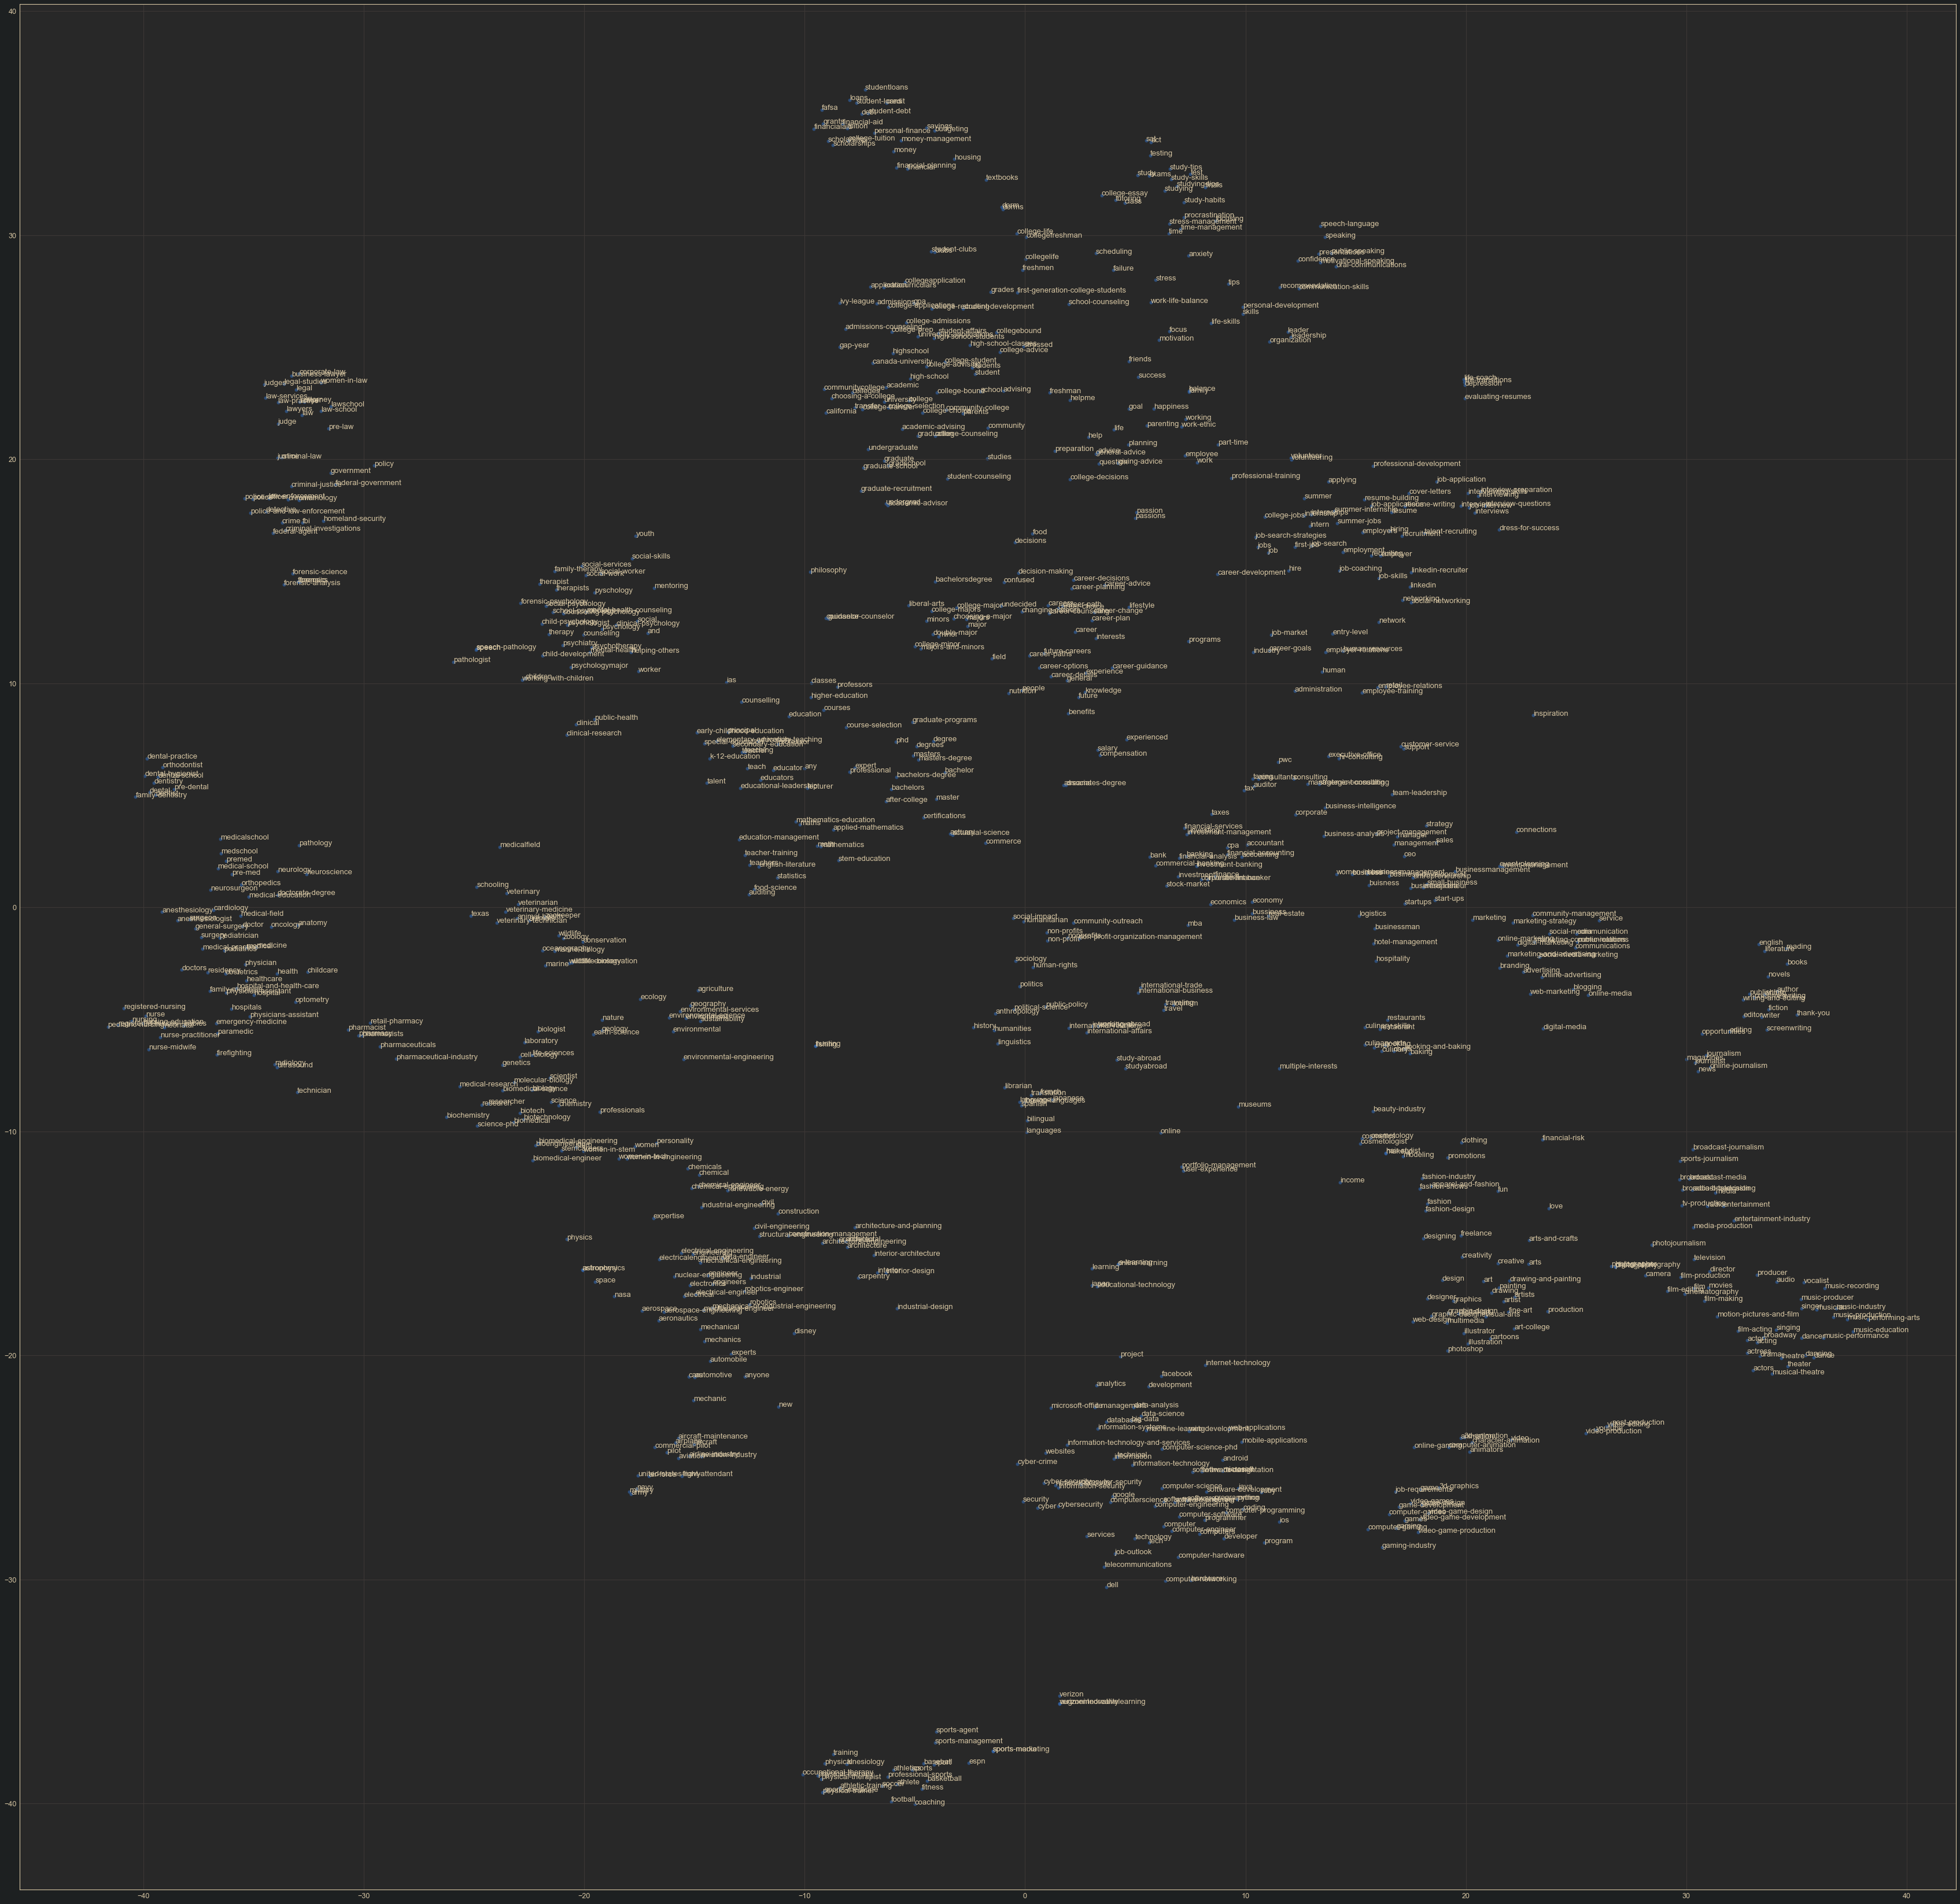

In [37]:
fig, ax = plt.subplots(figsize = (60, 60))

plt.scatter(proj[:, 0], proj[:, 1], alpha = 0.5)

for i, name in tqdm(enumerate(d2v.docvecs.index2entity)):
    ax.annotate(name, (proj[i, 0], proj[i, 1]))

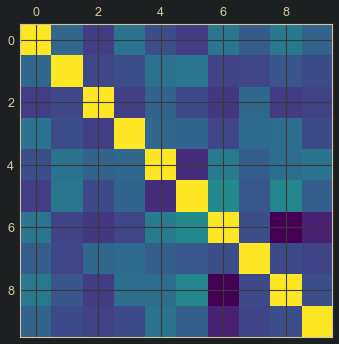

In [32]:
plt.matshow(pd.DataFrame(d2v.docvecs.vectors_docs).corr())

In [33]:
pd.DataFrame(d2v.docvecs.vectors_docs).corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.109616,-0.089680,0.177696,-0.010974,-0.088364,0.189643,0.058852,0.208805,0.094352
1,0.109616,1.000000,-0.046860,-0.014722,0.172068,0.192018,-0.060088,-0.053555,0.024076,-0.033592
2,-0.089680,-0.046860,1.000000,-0.086759,0.091504,-0.038041,-0.113683,0.111900,-0.102511,-0.071949
3,0.177696,-0.014722,-0.086759,1.000000,0.108752,0.096433,-0.051768,0.135875,0.149898,-0.036912
4,-0.010974,0.172068,0.091504,0.108752,1.000000,-0.158093,0.221143,0.071935,0.145269,0.173212
5,-0.088364,0.192018,-0.038041,0.096433,-0.158093,1.000000,0.303868,0.028529,0.279260,0.071260
6,0.189643,-0.060088,-0.113683,-0.051768,0.221143,0.303868,1.000000,-0.013673,-0.331892,-0.211277
7,0.058852,-0.053555,0.111900,0.135875,0.071935,0.028529,-0.013673,1.000000,-0.037387,-0.062698
8,0.208805,0.024076,-0.102511,0.149898,0.145269,0.279260,-0.331892,-0.037387,1.000000,-0.013872
9,0.094352,-0.033592,-0.071949,-0.036912,0.173212,0.071260,-0.211277,-0.062698,-0.013872,1.000000


# Save

In [34]:
d2v.save('tags.d2v')

In [35]:
docvecs = {d2v.docvecs.index2entity[i]: d2v.docvecs.vectors_docs[i] for i in range(len(d2v.docvecs.index2entity))}

In [36]:
with open('tags_embs.pickle', 'wb') as file:
    pickle.dump(docvecs, file)